<a href="https://colab.research.google.com/github/zainabkhalid90/Spotify-/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Path to the uploaded file on Colab
zip_file_path = '/content/spotify.zip'
extracted_folder = '/content/spotify_data'

# Create a directory for the extracted files
os.makedirs(extracted_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print(f"Data extracted to {extracted_folder}")

# Now create necessary directories for the project
os.makedirs('/content/spotify_analysis', exist_ok=True)
print("Created directory for project: /content/spotify_analysis")


Data extracted to /content/spotify_data
Created directory for project: /content/spotify_analysis


In [ ]:
# Define the correct path to the CSV file
file_path = os.path.join(data_folder, 'spotify_data.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Show the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display summary statistics to understand the data
print("Summary of the dataset:")
print(df.info())



First 5 rows of the dataset:
                      Songs & Artist     Streams      Daily
0       The Weeknd - Blinding Lights  4463658617  1619447.0
1          Ed Sheeran - Shape of You  4018102402  1001507.0
2  Lewis Capaldi - Someone You Loved  3588673578  1506961.0
3           Harry Styles - As It Was  3544187311  1611374.0
4            Post Malone - Sunflower  3518744128  1337404.0
Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Songs & Artist  2500 non-null   object 
 1   Streams         2500 non-null   int64  
 2   Daily           2498 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.7+ KB
None


In [ ]:
## Check the column names in the dataset
print("Column names in the dataset:")
print(df.columns)

# Show the first few rows of the dataset to see a sample
print("First 5 rows of the dataset:")
print(df.head())


Column names in the dataset:
Index(['Songs & Artist', 'Streams', 'Daily'], dtype='object')
First 5 rows of the dataset:
                      Songs & Artist     Streams      Daily
0       The Weeknd - Blinding Lights  4463658617  1619447.0
1          Ed Sheeran - Shape of You  4018102402  1001507.0
2  Lewis Capaldi - Someone You Loved  3588673578  1506961.0
3           Harry Styles - As It Was  3544187311  1611374.0
4            Post Malone - Sunflower  3518744128  1337404.0


Some rows failed to split properly:
         Songs & Artist    Streams     Daily        artist_name song_name
2196  Various Artists -  552631117  376335.0  Various Artists -      None
Top 10 Most Streamed Songs:
           song_name        artist_name     Streams
0    Blinding Lights         The Weeknd  4463658617
1       Shape of You         Ed Sheeran  4018102402
2  Someone You Loved      Lewis Capaldi  3588673578
3          As It Was       Harry Styles  3544187311
4          Sunflower        Post Malone  3518744128
5            Starboy         The Weeknd  3481137472
6          One Dance              Drake  3343221259
7               STAY      The Kid LAROI  3266446596
8    Sweater Weather  The Neighbourhood  3187169593
9           Believer    Imagine Dragons  3140449933


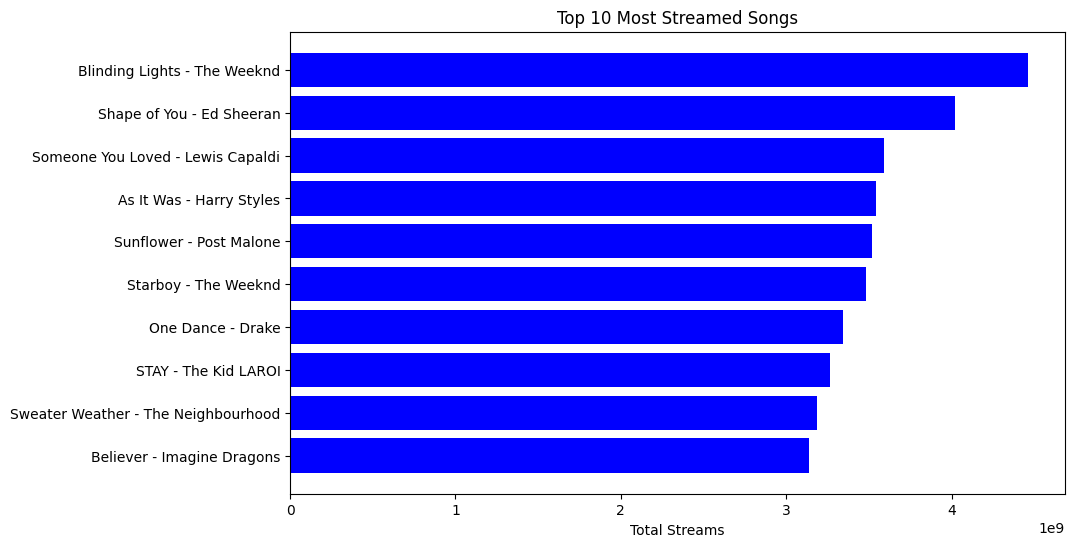

In [ ]:
# Split 'Songs & Artist' into 'artist_name' and 'song_name' safely
df[['artist_name', 'song_name']] = df['Songs & Artist'].str.split(' - ', n=1, expand=True)

# Check if any rows failed to split correctly (i.e., 'song_name' is NaN)
invalid_rows = df[df['song_name'].isna()]

if not invalid_rows.empty:
    print("Some rows failed to split properly:")
    print(invalid_rows)

# Drop rows where the split failed (optional, depends on your data)
df = df.dropna(subset=['song_name'])

# Drop the original 'Songs & Artist' column
df = df.drop(columns=['Songs & Artist'])

# Convert 'Streams' and 'Daily' to numeric (in case they are not)
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')
df['Daily'] = pd.to_numeric(df['Daily'], errors='coerce')

# Sort the data by total streams in descending order
most_streamed = df.sort_values(by='Streams', ascending=False)

# Display the top 10 most streamed songs
print("Top 10 Most Streamed Songs:")
print(most_streamed[['song_name', 'artist_name', 'Streams']].head(10))

# Optional: Visualize the top 10 streamed songs
import matplotlib.pyplot as plt

top_10 = most_streamed.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['song_name'] + ' - ' + top_10['artist_name'], top_10['Streams'], color='blue')
plt.xlabel('Total Streams')
plt.title('Top 10 Most Streamed Songs')
plt.gca().invert_yaxis()  # Invert the y-axis so the highest is



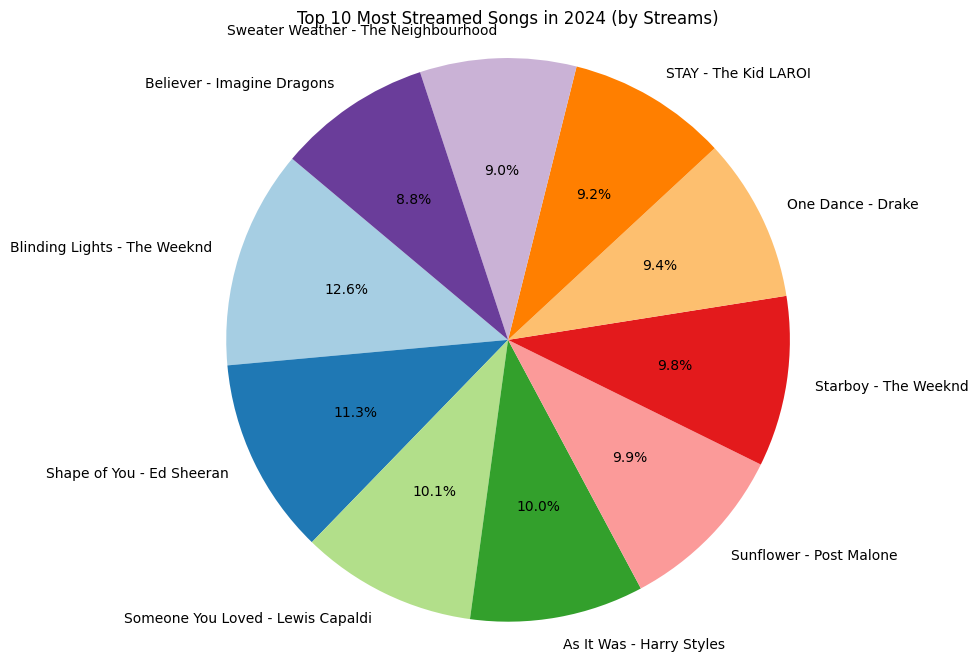

In [ ]:
import matplotlib.pyplot as plt

# Select the top 10 most streamed songs
top_10 = most_streamed.head(10)

# Create labels for the pie chart (combining song name and artist name)
labels = top_10['song_name'] + ' - ' + top_10['artist_name']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10['Streams'], labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Streamed Songs in 2024 (by Streams)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Display the pie chart
plt.show()


In [ ]:
artist_streams = df.groupby('artist_name')['Streams'].sum().reset_index()
artist_streams = artist_streams.sort_values(by='Streams', ascending=False)
print("Top 10 Artists by Total Streams:")
print(artist_streams.head(10))


Top 10 Artists by Total Streams:
       artist_name      Streams
832   Taylor Swift  39782835766
887     The Weeknd  38458817140
79       Bad Bunny  33999724737
248          Drake  33073789969
263     Ed Sheeran  32534029810
98   Billie Eilish  28253244160
683    Post Malone  27798876572
53   Ariana Grande  24852909491
273         Eminem  23541047091
127     Bruno Mars  22132869673


In [ ]:
daily_streams = df.sort_values(by='Daily', ascending=False)
print("Top 10 Songs by Daily Streams:")
print(daily_streams[['song_name', 'artist_name', 'Daily']].head(10))


Top 10 Songs by Daily Streams:
                 song_name        artist_name      Daily
1911                   Who              Jimin  7553534.0
647     BIRDS OF A FEATHER      Billie Eilish  7194182.0
590           Lose Control        Teddy Swims  7082537.0
418               Espresso  Sabrina Carpenter  5709725.0
1449      Good Luck, Babe!      Chappell Roan  5123739.0
1139  Please Please Please  Sabrina Carpenter  4525181.0
392       Beautiful Things       Benson Boone  4241882.0
1297    A Bar Song (Tipsy)          Shaboozey  3516596.0
850              Too Sweet             Hozier  3011228.0
564              Gata Only         FloyyMenor  2996560.0


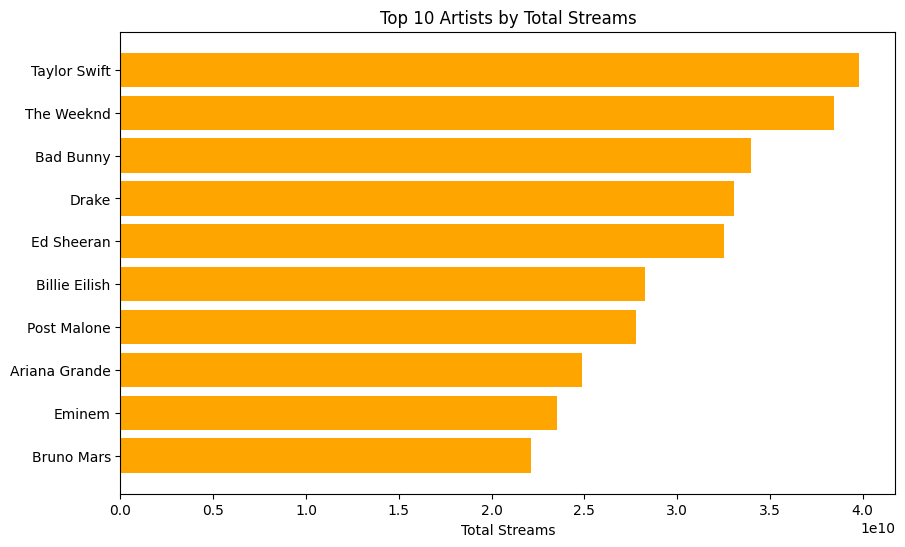

In [ ]:
top_10_artists = artist_streams.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists['artist_name'], top_10_artists['Streams'], color='orange')
plt.xlabel('Total Streams')
plt.title('Top 10 Artists by Total Streams')
plt.gca().invert_yaxis()
plt.show()
